In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [3]:
data = pd.read_csv("strokedata.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
print(f"number of rows: {data.shape[0]}\nnumber of columns: {data.shape[1]}")

number of rows: 5110
number of columns: 12


In [6]:
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

## Exploratory Data Analysis

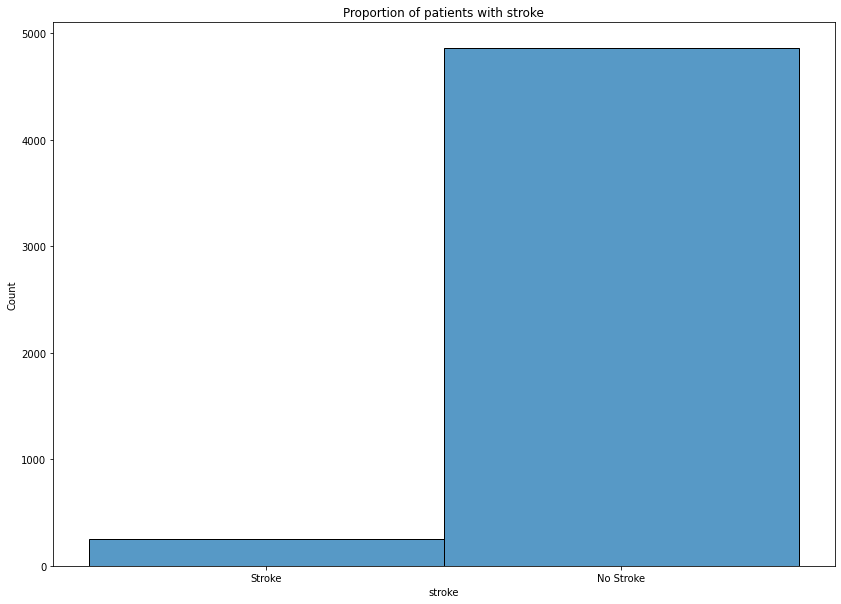

In [7]:
plt.figure(figsize=(14,10))
labels = ['No Stroke', 'Stroke']
stroke_dict = {0:'No Stroke', 1:'Stroke'}
strokemap = data.stroke.map(stroke_dict)
sns.histplot(strokemap)

plt.title("Proportion of patients with stroke")
plt.show()

### Inferences
- The number of people who had a stroke are far less than people who did not. Since this is the target variable, we have an unbalanced dataset. We will look at how to deal with these later.

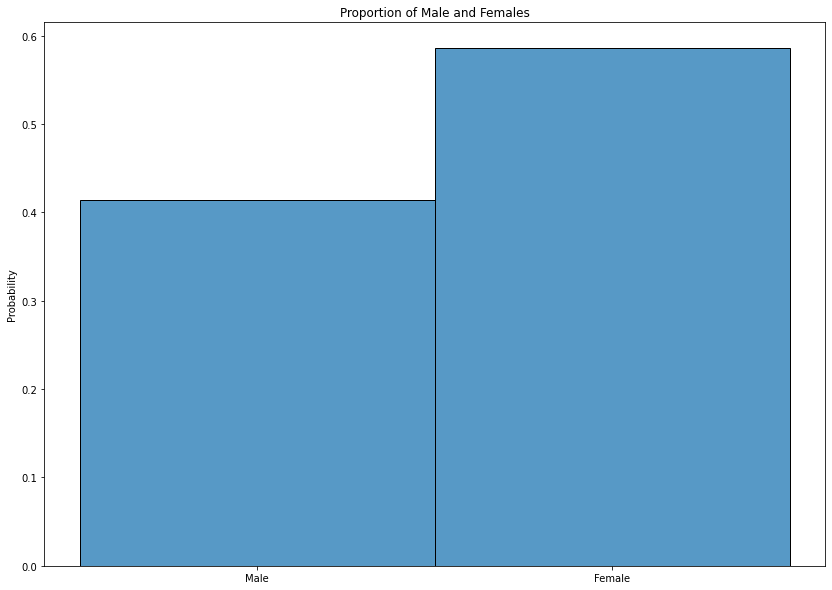

In [8]:
plt.figure(figsize=(14,10))
labels = ['Female', 'Male', 'Other']

sns.histplot(data.gender.values[data.gender != 'Other'], stat='probability')

plt.title("Proportion of Male and Females")
plt.show()

### Inferences
- Almost 60 percent of the patients are female. 40 percent are Male. Only one patient belongs to "other"

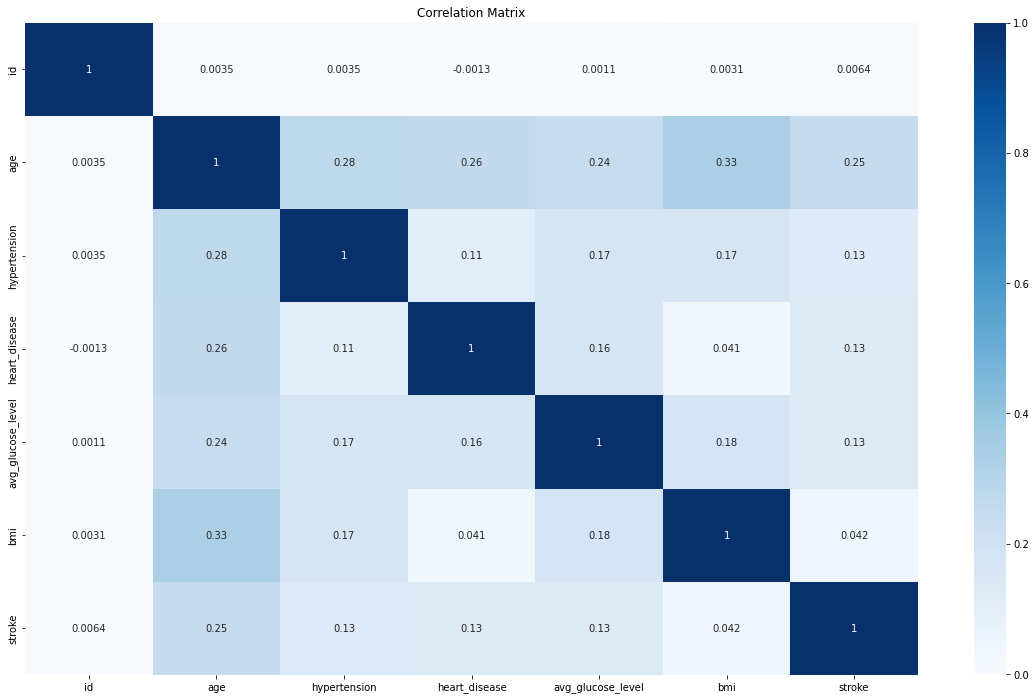

In [9]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

plt.title("Correlation Matrix")
plt.show()

### Inferences - Correlation Matrix
- id of the patient is very weakly correlated (will be dropped)
- age shows the strongest correlation with stroke
- BMI is weakly correlated with stroke, which may seem odd but studies show that there is indeed no association between them.

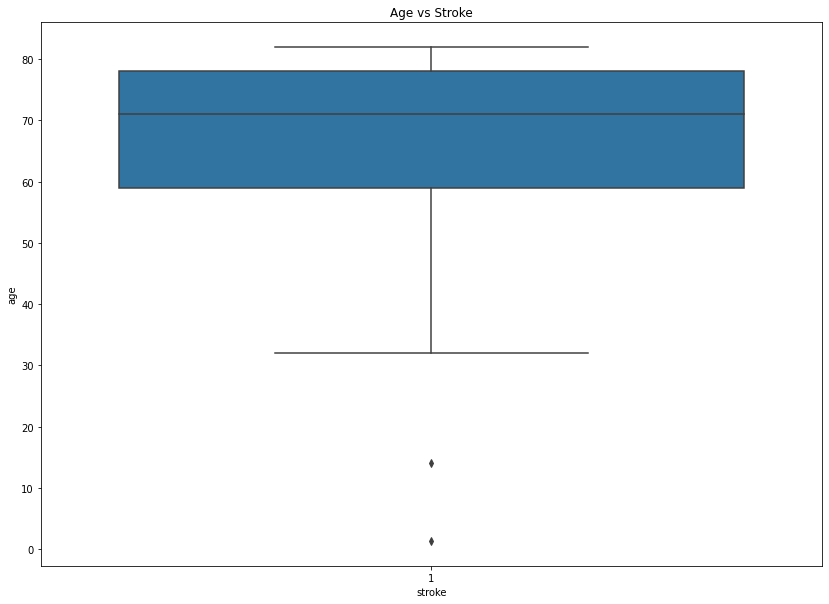

In [10]:
plt.figure(figsize=(14,10))
sns.boxplot(x=data.stroke[data.stroke==1], y=data['age'])
plt.title("Age vs Stroke")

plt.show()

### Inferences
- Patients who had a stroke are older with only a few outliers. Mean age is 67.
- Some more statistics regarding age are given below.

In [11]:
data.age[data.stroke==1].describe()

count    249.000000
mean      67.728193
std       12.727419
min        1.320000
25%       59.000000
50%       71.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64

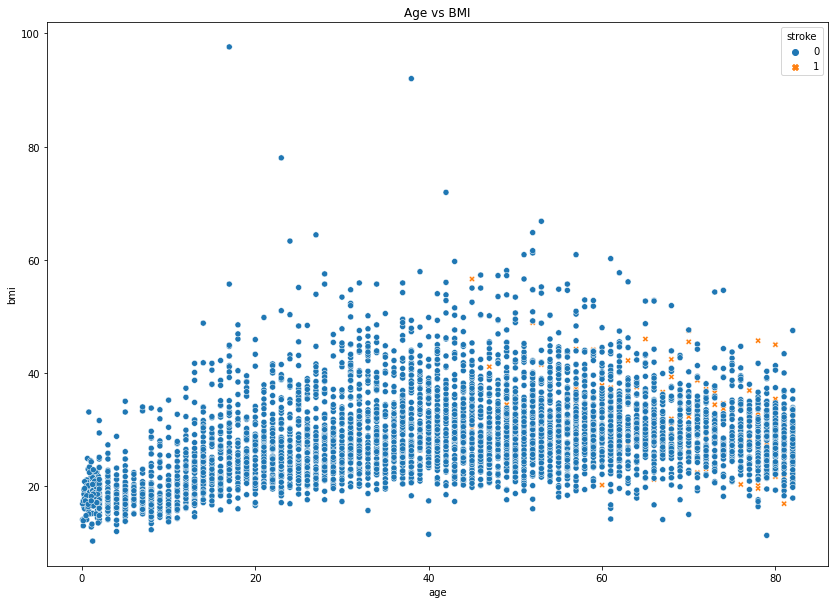

In [12]:
plt.figure(figsize=(14,10))
sns.scatterplot(x=data['age'], y=data['bmi'], hue=data['stroke'], style=data['stroke'])
plt.title("Age vs BMI")

plt.show()

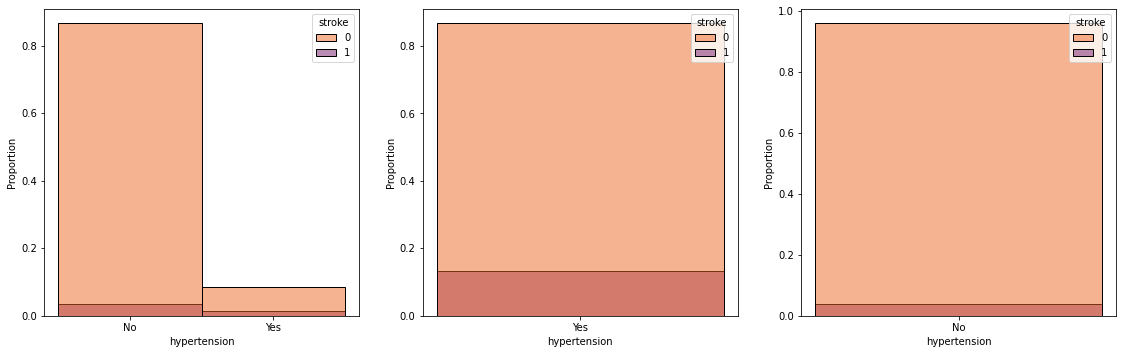

In [13]:
plt.figure(figsize=(26,26))
plt.title("Hypertension distribution")
hyper_dict = {1:'Yes', 0:'No'}
hypertens = data.hypertension.map(hyper_dict) 

hist1 = plt.subplot2grid((4,4), (0,0))
hist1 = sns.histplot(x=hypertens,hue=data['stroke'], discrete=True, palette='inferno_r', stat='proportion')

hist2 = plt.subplot2grid((4,4), (0,1))
hist2 = sns.histplot(x=hypertens[hypertens=='Yes'],hue=data['stroke'], discrete=True, palette='inferno_r', stat='proportion')

hist3 = plt.subplot2grid((4,4), (0,2))
hist3 = sns.histplot(x=hypertens[hypertens=='No'],hue=data['stroke'], discrete=True, palette='inferno_r', stat='proportion')

plt.show()

### Inferences
- Number of people who did not have hypertension are far more than those who did.
- But we can observe that people who had hypertension are more likely to suffer a stroke than those who did not have hypertension 

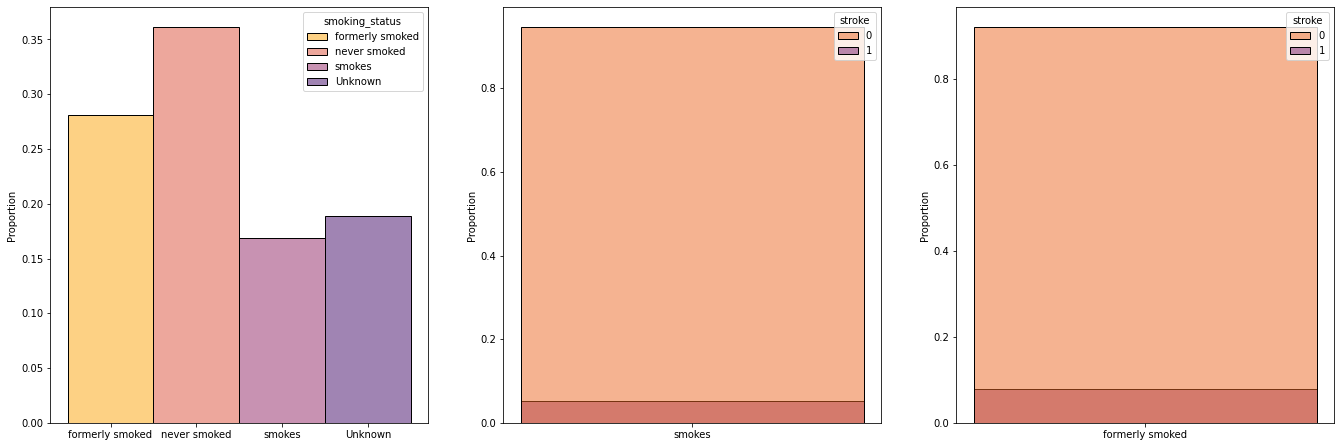

In [14]:
plt.figure(figsize=(23,26))
plt.subplot2grid((3,3), (0,0))
sns.histplot(x=data.smoking_status[data.stroke==1], hue=data['smoking_status'], palette='inferno_r', stat='proportion')
plt.xlabel("")
plt.subplot2grid((3,3), (0,1))
sns.histplot(x=data.smoking_status[data.smoking_status=='smokes'], hue=data.stroke, palette='inferno_r', stat='proportion')
plt.xlabel("")

plt.subplot2grid((3,3), (0,2))
sns.histplot(x=data.smoking_status[data.smoking_status=='formerly smoked'], hue=data.stroke, palette='inferno_r', stat='proportion')
plt.xlabel("")
plt.show()

### Inferences
- Smoking status has little influence on the probability of having a stroke

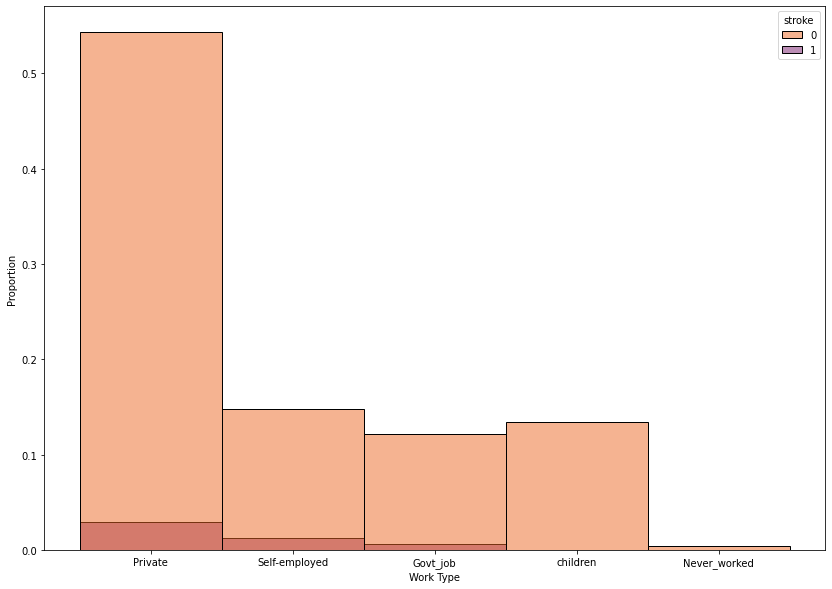

In [15]:
plt.figure(figsize=(14,10))
sns.histplot(x=data.work_type, hue=data.stroke, palette='inferno_r', stat='proportion')
plt.xlabel("Work Type")

plt.show()

### Inferences
- Most people work at a private company
- Most people who had a stroke work at a private company

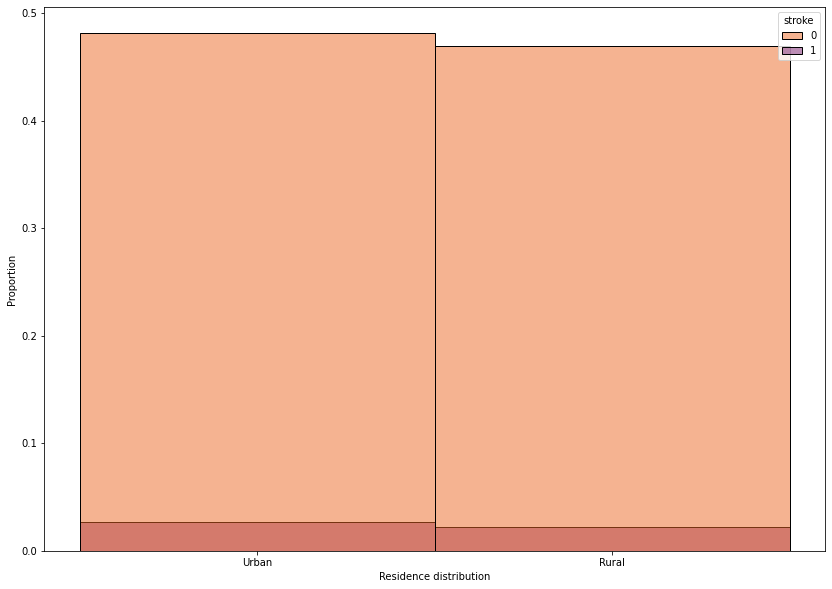

In [16]:
plt.figure(figsize=(14,10))
sns.histplot(x=data.Residence_type, hue=data.stroke, palette='inferno_r', stat='proportion')
plt.xlabel("Residence distribution")

plt.show()

### Inferences
- More urban people suffered a stroke than Rural people

## Preprocessing of data

### Checking for NA values

In [17]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### As we can see, the BMI column has 201 NA values. We replace these with the average BMI.

In [18]:
mean_bmi = np.mean(data['bmi'])
print(f"Average BMI: {mean_bmi:0.3f}") 

Average BMI: 28.893


In [19]:
data['bmi'].fillna(mean_bmi, inplace=True)

In [20]:
data['bmi'].isna().sum()

0

## Categorical Variables
Here, we need to encode discrete categorical values as most ML models work with numerical values.
- Gender
- Marriage_status
- Work
- Residence
- Smokers

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [22]:
gender = enc.fit_transform(data[['gender']]).toarray()
enc.categories_

[array(['Female', 'Male', 'Other'], dtype=object)]

In [23]:
marriage_status = enc.fit_transform(data[['ever_married']]).toarray()
enc.categories_

[array(['No', 'Yes'], dtype=object)]

In [24]:
work = enc.fit_transform(data[['work_type']]).toarray()
enc.categories_

[array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object)]

In [25]:
residence = enc.fit_transform(data[['Residence_type']]).toarray()
enc.categories_

[array(['Rural', 'Urban'], dtype=object)]

In [26]:
smokers = enc.fit_transform(data[['smoking_status']]).toarray()
enc.categories_

[array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [27]:
data[['Female', 'Male', 'Other']] = gender
data[['marriage_No', 'marriageYes']] = marriage_status
data[['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'Children']] = work
data[['Rural', 'Urban']] = residence
data[['Unknown', 'formerly smoked', 'never smoked', 'smokes']] = smokers

In [28]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Never_worked,Private,Self-employed,Children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Standardization of numerical, continuous variables
We standardize values to increase accuracy of the ML model
- Age
- Average Glucose Level
- BMI

In [29]:
standardised = data[['age', 'avg_glucose_level', 'bmi']]

In [30]:
for i in range(standardised.shape[1]):
    mean = standardised.iloc[:,i].mean()
    stdev = standardised.iloc[:,i].std()
    for j in range(standardised.shape[0]):
        standardised.iloc[j,i] = (standardised.iloc[j,i] - mean)/stdev

C:\Users\user\AppData\Local\Temp\ipykernel_18356\3770129428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standardised.iloc[j,i] = (standardised.iloc[j,i] - mean)/stdev


In [31]:
standardised.head(20)

,age,avg_glucose_level,bmi
0,1.051331,2.706111,1.001136e+00
1,0.785993,2.121351,4.615102e-16
2,1.626231,-0.005028,4.685314e-01
3,0.255317,1.437217,7.153482e-01
4,1.582008,1.501038,-6.356489e-01
5,1.670454,1.768022,1.386891e-02
6,1.360893,-0.796264,-1.939768e-01
7,1.139777,-0.259646,-7.915332e-01
8,0.697547,-0.662441,4.615102e-16
9,1.537785,-1.050661,-6.096682e-01


In [32]:
data['age_S'] = standardised['age']
data['gluc_lev_S'] = standardised['avg_glucose_level']
data['bmi_S'] = standardised['bmi']

In [33]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,age_S,gluc_lev_S,bmi_S
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.051331,2.706111,1.001136e+00
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.785993,2.121351,4.615102e-16
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.626231,-0.005028,4.685314e-01
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.255317,1.437217,7.153482e-01
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.582008,1.501038,-6.356489e-01
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.670454,1.768022,1.386891e-02
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.360893,-0.796264,-1.939768e-01
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.139777,-0.259646,-7.915332e-01
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.697547,-0.662441,4.615102e-16
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.537785,-1.050661,-6.096682e-01


After these steps of preprocessing, we drop columns that are of no use.

In [34]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Female', 'Male', 'Other', 'marriage_No',
       'marriageYes', 'Govt_job', 'Never_worked', 'Private', 'Self-employed',
       'Children', 'Rural', 'Urban', 'Unknown', 'formerly smoked',
       'never smoked', 'smokes', 'age_S', 'gluc_lev_S', 'bmi_S'],
      dtype='object')

In [35]:
cols_to_add = ['hypertension', 'heart_disease', 'marriageYes', 'marriage_No', 'Govt_job', 
               'Never_worked', 'Private', 'Self-employed', 'Children',
               'Female', 'Male', 'Other', 'Rural', 'Urban', 'Unknown',  'formerly smoked',
               'never smoked', 'smokes', 'age_S', 'gluc_lev_S', 'bmi_S', 'stroke'] 
final_data = data[cols_to_add]

In [36]:
final_data = final_data.sample(frac=1, replace=True, random_state=55)

In [37]:
final_data.head()

,hypertension,heart_disease,marriageYes,marriage_No,Govt_job,Never_worked,Private,Self-employed,Children,Female,...,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,age_S,gluc_lev_S,bmi_S,stroke
4557,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,-1.159821,-0.538334,2.053355,0
4762,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.449339,-0.606571,-0.726581,0
4391,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-1.204044,-0.565275,-0.700601,0
968,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.520655,0.139616,0.507502,0
2021,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.520655,0.276973,-0.323880,0


This concludes the data preprocessing. Now, we build our model for predictions.
- First step is to split the dataset into training and testing sets

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = final_data.iloc[:,0:21]
y = final_data.iloc[:,21]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [50]:
model = {'Model':[], 'Accuracy':[]}

## Support Vector Classifier

In [51]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print(f"Accuracy with Support Vector Classifier: {acc*100:0.2f}%")
model['Model'].append('Support Vector Classifier')
model['Accuracy'].append(acc)

Accuracy with Support Vector Classifier: 93.97%


## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print(f"Accuracy with Random Forest Classifier: {acc*100:0.2f}%")
model['Model'].append('Random Forest Classifier')
model['Accuracy'].append(acc)

Accuracy with Random Forest Classifier: 96.64%


## Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print(f"Accuracy with Gradient Boosting Classifier: {acc*100:0.2f}%")
model['Model'].append('Gradient Boosting Classifier')
model['Accuracy'].append(acc)

Accuracy with Gradient Boosting Classifier: 94.84%


Finally, we look at the comparison between different models using their accuracy

In [56]:
modeldf = pd.DataFrame(model)
modeldf

,Model,Accuracy
0,Support Vector Classifier,0.939750
1,Random Forest Classifier,0.966354
2,Gradient Boosting Classifier,0.948357
